In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
%matplotlib inline

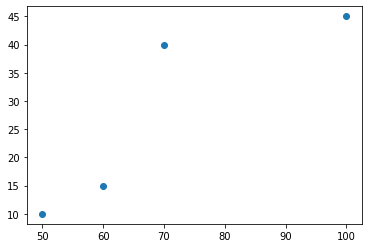

In [3]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]
plt.scatter(x_hw, y_hw )
plt.show()

In [307]:
X = np.array([[1,50], [1,60],[1,70],[1,100]])
Y = np.array([[10],[15],[40],[45]])

w = (inv((X.T).dot(X))).dot(X.T).dot(Y)
print("w1 =%.5f, w2 = %.3f" % (w[0][0],w[1][0]))

w1 =-22.50000, w2 = 0.714


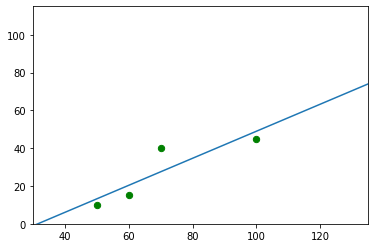

In [5]:
margin = 70
X_min = X[:,1].max()-margin
X_max = X[:,1].max()+margin/2
X_support = np.linspace(X_min, X_max, num=100)
Y_model = w[0][0] +w[1][0]*X_support

plt.xlim(X_min,X_max)
plt.ylim(0, Y[:,0].max()+ margin)
plt.scatter(X[:,1], Y[:,0], 40,'g','o')
plt.plot(X_support,Y_model)
plt.show()

45

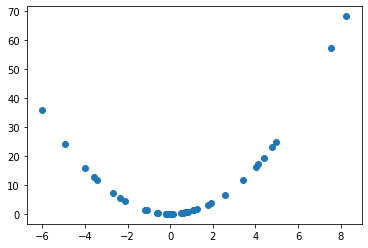

In [6]:
y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

diff = y_true_ - y_pred_
diff_squ = diff**2
plt.scatter(diff, diff_squ)
plt.show()

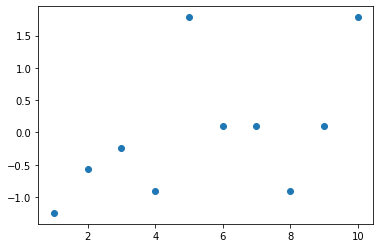

In [7]:
from sklearn.preprocessing import StandardScaler


x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)

tr_data = StandardScaler().fit_transform(y.reshape(-1,1)).reshape(-1)
tr_data

plt.scatter(x,tr_data)
plt.show()

In [8]:
dtf = pd.read_csv('3.10_non_linear.csv', sep=",")
dtf.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [10]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [20]:
degree = 10

X = generate_degrees(dtf['x_train'], degree)

print(X)

[1.38368445e-01 1.91458266e-02 2.64917826e-03 3.66562677e-04
 5.07207077e-05 7.01814547e-06 9.71089877e-07 1.34368196e-07
 1.85923184e-08 2.57259019e-09]


In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def train_polynomial(degree, dtf):
    
    
    X = generate_degrees(dtf['x_train'], degree)

    model = LinearRegression().fit(X, dtf['y_train'])
    y_pred = model.predict(X)

    error = r2_score(dtf['y_train'], y_pred)
    print("Коэффициент детерминации %d Ошибка %.3f" % (degree, error))

    

In [227]:
for degree in range(1,11):
    print(train_polynomial(degree,dtf))


Коэффициент детерминации 1 Ошибка 0.519
None
Коэффициент детерминации 2 Ошибка 0.533
None
Коэффициент детерминации 3 Ошибка 0.888
None
Коэффициент детерминации 4 Ошибка 0.895
None
Коэффициент детерминации 5 Ошибка 0.896
None
Коэффициент детерминации 6 Ошибка 0.899
None
Коэффициент детерминации 7 Ошибка 0.900
None
Коэффициент детерминации 8 Ошибка 0.909
None
Коэффициент детерминации 9 Ошибка 0.909
None
Коэффициент детерминации 10 Ошибка 0.909
None


In [ ]:
error

In [300]:
def train_polynomial(degree, dtf):
    
    
    X = generate_degrees(dtf['x_train'], degree)

    model = LinearRegression().fit(X, dtf['y_train'])
    y_pred = model.predict(X)

    error = r2_score(dtf['y_train'], y_pred)
    return degree, error

In [301]:
k=[]
for degree in range(1,25):
    k.append(train_polynomial(degree,dtf))
k1=pd.DataFrame(k)
np.array(k1[k1[1]==k1[1].max()]).tolist()

[[14.0, 0.9163998644919205]]

In [305]:
degree = 14

train_polynomial(degree,dtf)
model = LinearRegression().fit(X, dtf['y_train'])
y_pred = model.predict(X)
y_pred

array([ 0.88210097,  1.01897622,  1.21593663,  1.90777397,  1.89320068,
        1.96799159,  1.99510714,  2.00255713,  2.05113541,  2.05904861,
        2.07135515,  2.08488904,  2.0878935 ,  2.05782442,  1.96152895,
        1.70752908,  1.25295913,  1.19221964,  1.03691937,  1.00291056,
        0.88643136,  0.87018964,  0.48418417,  0.44549163,  0.29608611,
        0.26126515,  0.20252298,  0.19922475,  0.17116326,  0.15216131,
        0.15216131,  0.15070403,  0.14577292,  0.13117661,  0.0936225 ,
        0.08594859,  0.07275958,  0.06757109, -0.0088838 , -0.00456109,
        0.00499679,  0.0586599 ,  0.10034354,  0.22510037,  0.27123177,
        0.37545173,  0.56831688,  0.96442833,  0.93519255,  0.93519255])

In [404]:
class CustomLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    
    def fit(self, X, y):
        
        
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        
        if self._fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        
        
        xTx = np.dot(X.T, X)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
       
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
    def predict(self, X):
        
       
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 
        return self.intercept_ + np.dot(X, self.coef_) 



In [480]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X = boston_dataset.data
y = boston_dataset.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


In [481]:
from sklearn.linear_model import Ridge, Lasso
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)


In [482]:
error = r2_score(y_valid, y_pred)
error

0.670933983911564

In [483]:
tr_data1 = StandardScaler().fit_transform(y.reshape(-1,1)).reshape(-1)
tr_data2 = StandardScaler().fit_transform(X)

In [484]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(tr_data2, tr_data1, test_size=0.2, random_state=10)

model = LinearRegression().fit(X_train1,y_train1)
y_pred1 = model.predict(X_valid1)
y_pred_train1 = model.predict(X_train1)

In [485]:
error1 = r2_score(y_valid1, y_pred1)
error1  #Метрика не поменялась

0.6709339839115632